# Bike Sharing Assignment

## Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. They want to understand the factors on which the demand for these shared bikes depends.

Essentially, the company wants —
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Solution
Create a linear model that describe the effect of various features on demand.


## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warning

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Numpy and Pandas libraries

import numpy as np
import pandas as pd

In [3]:
# Read data - Bike Sharing Dataset

day = pd.read_csv("day.csv")

In [4]:
# Check the head of dataset

day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
# Check the shape of dataset

day.shape

(730, 16)

In [6]:
# Check the summary of dataset

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Check the mean, std and IQR values of numerical varaible using describe funtion

day.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [8]:
# Check Null values

day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Data Cleaning

Drop the unnecessary variables

In [9]:
# Instant column is just a number and we cannot figure out any pattern so it can be dropped

day = day.drop('instant', axis=1)

In [10]:
# temp and atemp column are redundant having similar information so one of the column can be dropped

day = day.drop('atemp', axis=1)

In [11]:
# cnt column is giving the demard information so casual and registered column can be dropped as its redundant information

day = day.drop('casual', axis=1)
day = day.drop('registered', axis=1)

In [12]:
# dteday column can be dropped as it contains redundant information

day = day.drop('dteday', axis=1)

##### Checking the data-type of columns and making necessary changes

In [13]:
# Checking season values

day.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
# For easy interpretation changing the season label values as per Data Characteristics

day["season"].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
day.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
# As per Dataset Characteristics season should be catergorical varible so converting it into categorical type

day["season"] = day["season"].astype('category')
day.dtypes

season        category
yr               int64
mnth             int64
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [16]:
# For easy interpretation changing the month label values to month names

day["mnth"].replace({1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)
day.mnth.value_counts()

Oct      62
July     62
Dec      62
May      62
March    62
Aug      62
Jan      62
June     60
Nov      60
Sept     60
April    60
Feb      56
Name: mnth, dtype: int64

In [17]:
# Converting month into categorical type

day["mnth"] = day["mnth"].astype('category')
day.dtypes

season        category
yr               int64
mnth          category
holiday          int64
weekday          int64
workingday       int64
weathersit       int64
temp           float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [18]:
# For easy interpretation changing the weekday label values into names of the days

day["weekday"].replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}, inplace=True)
day.weekday.value_counts()

Sun    105
Sat    105
Mon    105
Thu    104
Fri    104
Tue    104
Wed    103
Name: weekday, dtype: int64

In [19]:
# Converting weekday into categorical type

day["weekday"] = day["weekday"].astype('category')
day.dtypes

season        category
yr               int64
mnth          category
holiday          int64
weekday       category
workingday       int64
weathersit       int64
temp           float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

In [20]:
# For easy interpretation changing the weathersit label values into weather names 

day["weathersit"].replace({1:'Clear', 2:'Mist and Cloudy', 3:'Light Snow and Rain', 4:'Heavy Snow and Rain'}, inplace=True)
day.weathersit.value_counts()

Clear                  463
Mist and Cloudy        246
Light Snow and Rain     21
Name: weathersit, dtype: int64

In [21]:
# Converting weathersit into categorical type

day["weathersit"] = day["weathersit"].astype('category')
day.dtypes

season        category
yr               int64
mnth          category
holiday          int64
weekday       category
workingday       int64
weathersit    category
temp           float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

## Step 2: Visualising the Data

- EDA to understand various variables: Univariate and Bivairate analysis
- Correlation between the variables
- Check whether linear regression model make sense or not
- Check linear relationship with cnt variable
- Ensure that we want to build a linear regression model using basic visualization
- By visualizing the data, in case of multiple regression model there is multicollinearity

In [22]:
# Visualize data using matplotlib and seaborn libraries

import matplotlib.pyplot as plt
import seaborn as sns

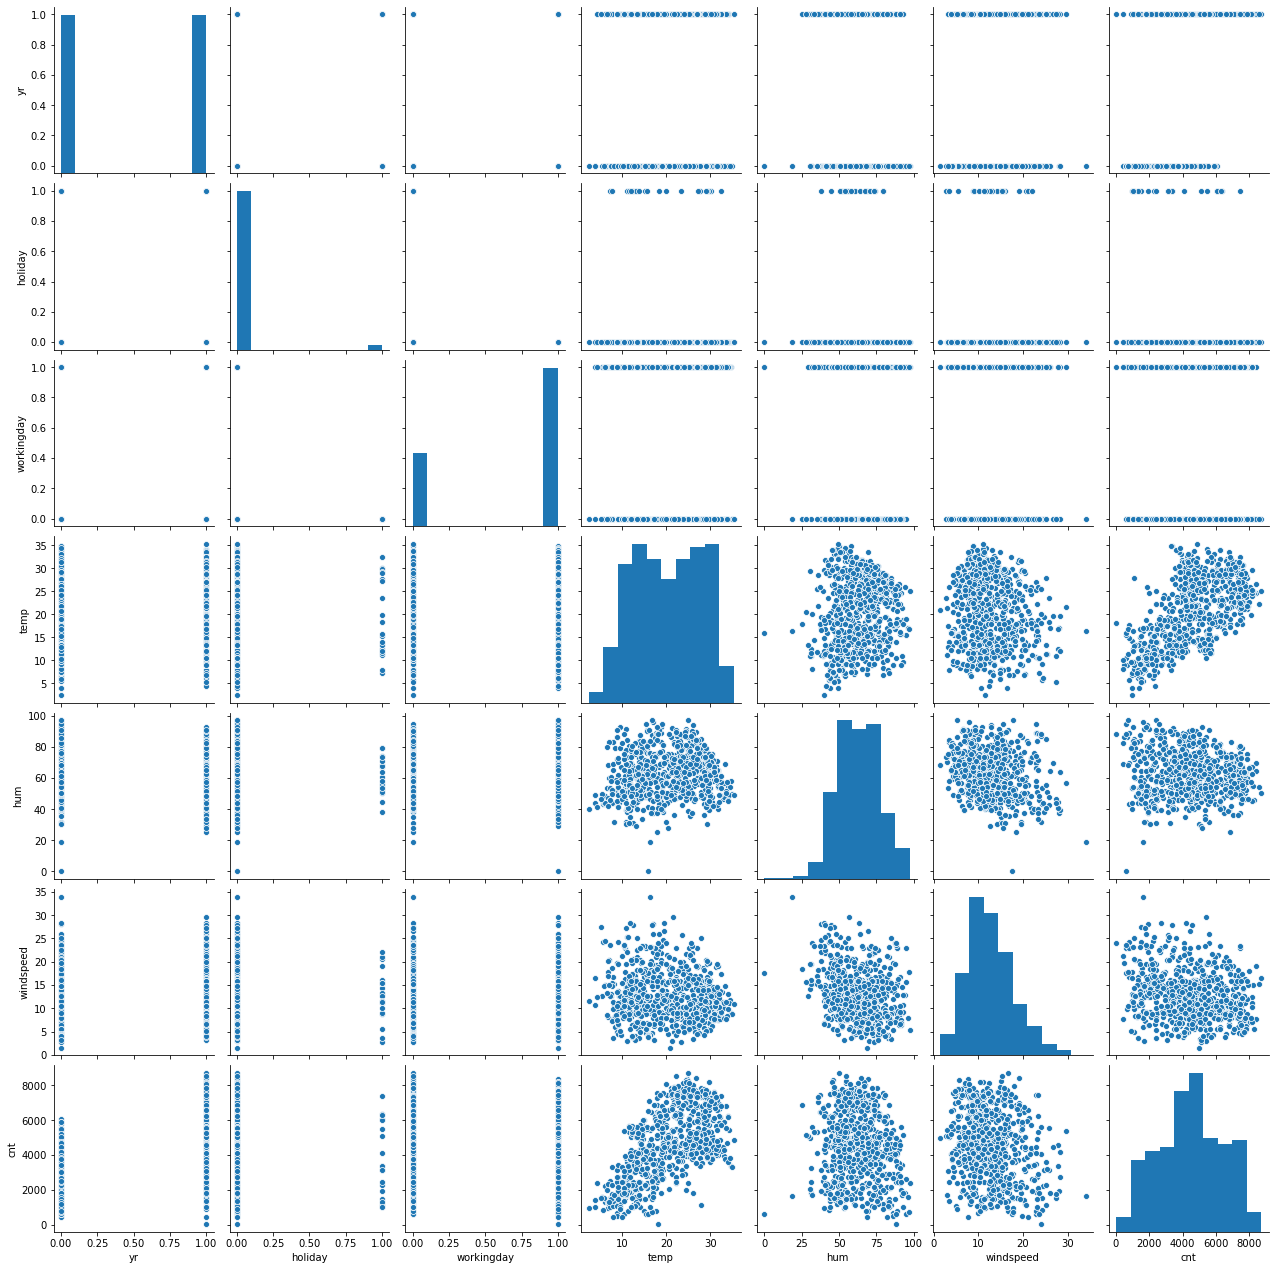

In [23]:
# Visualize data between all the numerical variables using scatter plot 

sns.pairplot(day)
plt.show()

- Positive correlation between cnt vs temp, hum, and windspeed that indicates some of the variance in cnt is explained by temp. So, these variables seems to be a predictors for cnt
- The cnt seems to be increasing with workingday, holiday, and yr so it indicates some positive correlation between these variables

##### Conclusion:
There are some variables that shows a positive correlation with cnt so we can consider linear regression model

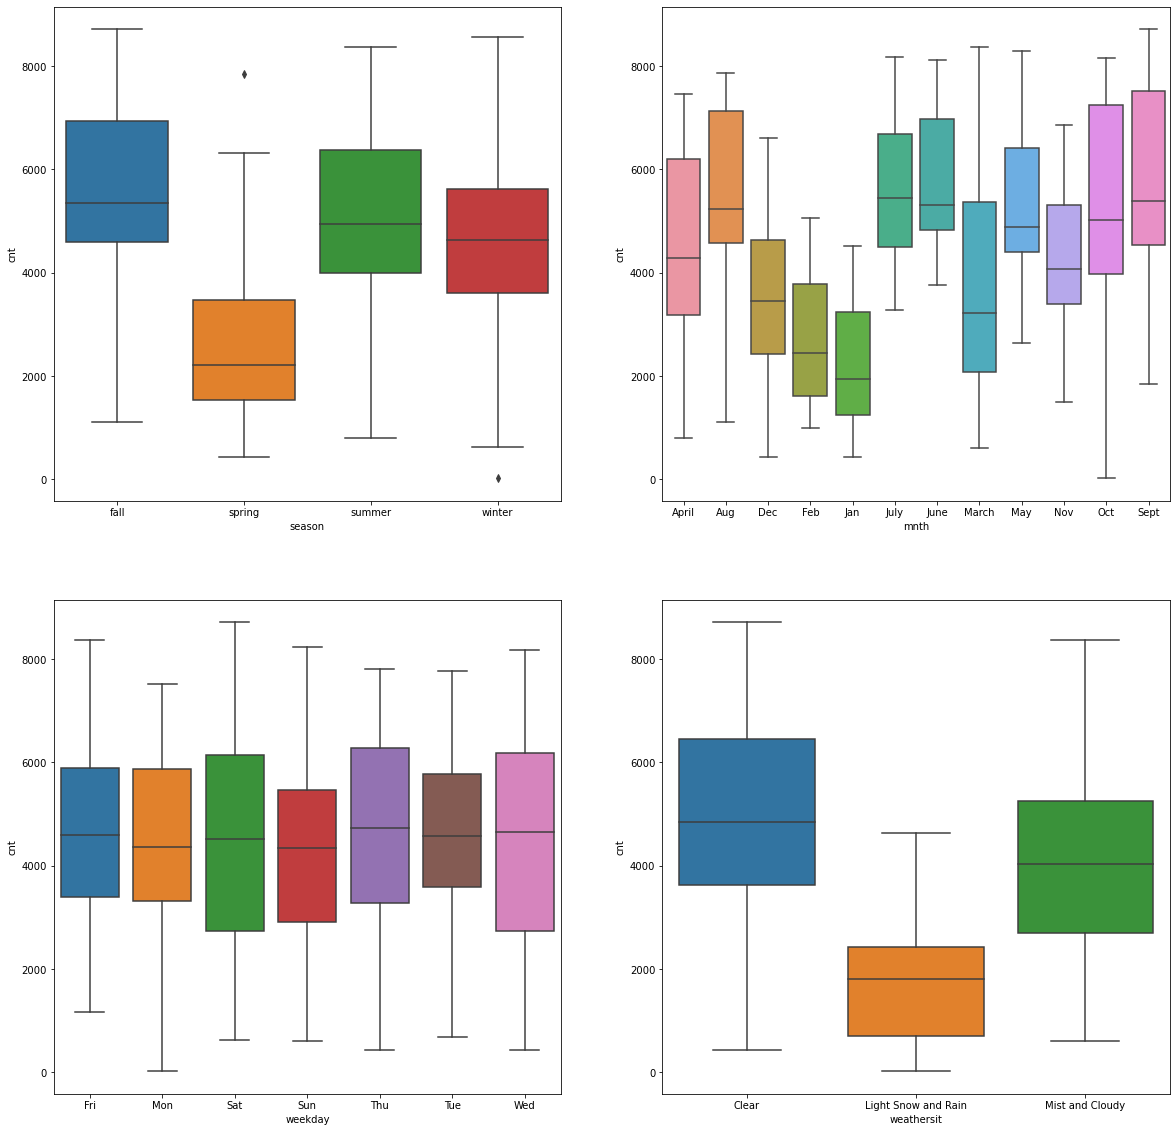

In [24]:
# Visualize data between all the categorial variables using box plot

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.boxplot(x="season", y="cnt", data=day)

plt.subplot(2,2,2)
sns.boxplot(x="mnth", y="cnt", data=day)

plt.subplot(2,2,3)
sns.boxplot(x="weekday", y="cnt", data=day)

plt.subplot(2,2,4)
sns.boxplot(x="weathersit", y="cnt", data=day)

plt.show()

- The bike renting is usually low during spring season compared with other seasons
- The bike renting is goes up from April until Oct and then start going down from Nov until March
- The bike renting is very low when the weather is light snow and rain and nil when there is heavy snow and rain.

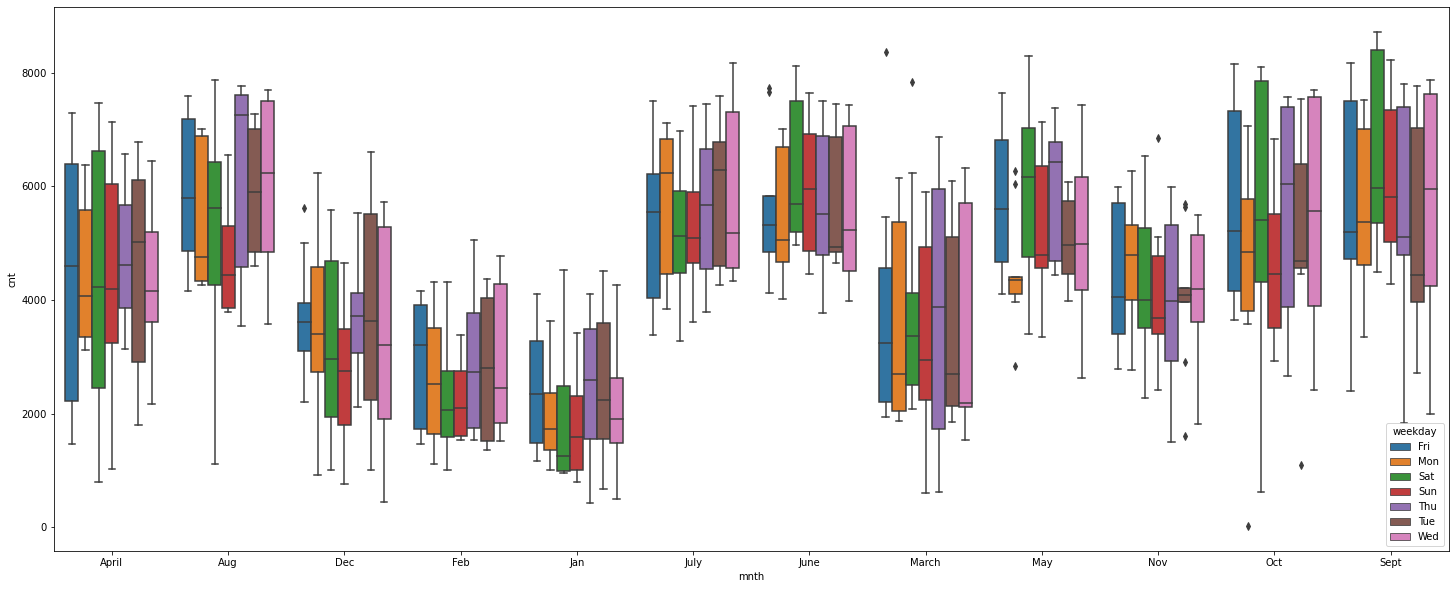

In [25]:
# Visualise some of these categorical features parallely
plt.figure(figsize=(25,10))
sns.boxplot(x="mnth", y="cnt", hue="weekday", data=day)
plt.show()

Above is the plot for month with days

- It seems the highest booking in
    - June is during weekends Sun followed by Sat
    - July is during weekdays Tue followed by Monday
    - Aug is during weekdays Thu followed by Wed
    - Sept is during weekends Sat followed by Sun, there is an exception in Wed
    - Oct is during weekdays Thu followed by Wed

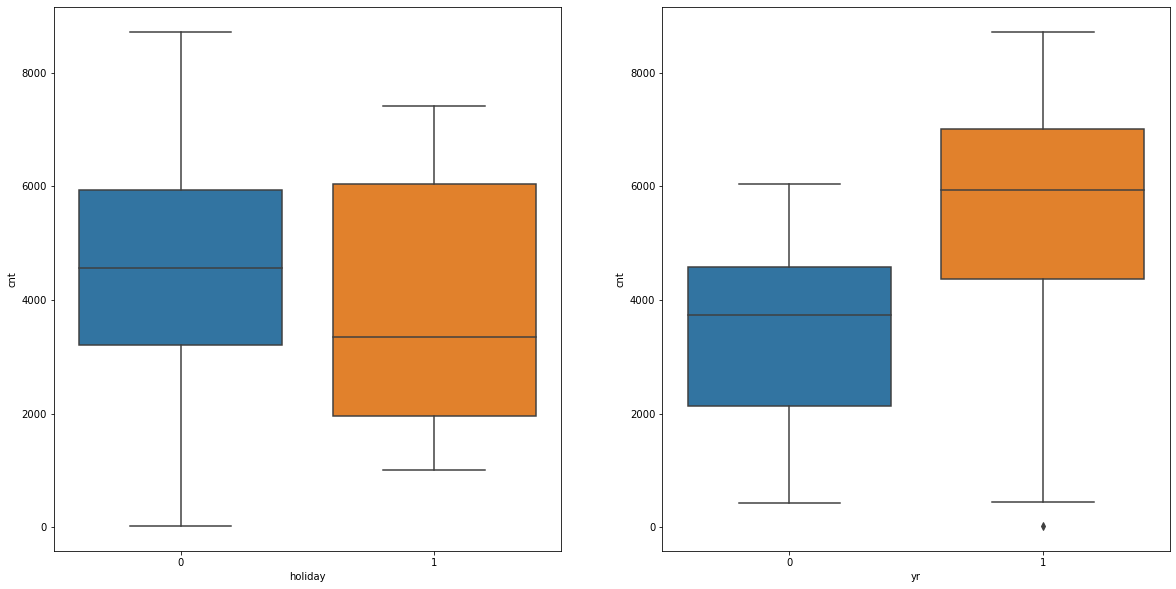

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(x="holiday", y="cnt", data=day)

plt.subplot(1,2,2)
sns.boxplot(x="yr", y="cnt", data=day)

plt.show()

Above plot indicates:
- The demand is high on holidays vs non-holidays
- The demand is going up in 2019 compared with 2018

## Step 3: Data Preparation

- Encoding
    - Converting categorical variables into dummy variables


In [27]:
day.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [28]:
# Create dummy variables for season
# Dropping the redundant dummy variable
season_dummy = pd.get_dummies(day['season'], drop_first=True)
season_dummy.head()


,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [29]:
# Concat the season_dummy df with day df
day = pd.concat([day,season_dummy], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist and Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Sun,0,Mist and Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [30]:
# Drop season column as its redundant
day = day.drop(['season'], axis=1)
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Sat,0,Mist and Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sun,0,Mist and Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [31]:
# Create dummy variables for mnth
# Dropping the redundant dummy variable
season_mnth = pd.get_dummies(day['mnth'], drop_first=True)
season_mnth.head()


,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [32]:
# Concat the season_dummy df with day df
# Drop mnth column as its redundant
day = pd.concat([day,season_mnth], axis=1)
day = day.drop(['mnth'], axis=1)
day.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,0,0,Sat,0,Mist and Cloudy,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sun,0,Mist and Cloudy,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [33]:
# Create dummy variables for weekday
# Dropping the redundant dummy variable
season_weekday = pd.get_dummies(day['weekday'], drop_first=True)
season_weekday.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [34]:
# Concat the season_weekday df with day df
# Drop weekday column as its redundant
day = pd.concat([day,season_weekday], axis=1)
day = day.drop(['weekday'], axis=1)
day.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,Mist and Cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,Mist and Cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# Create dummy variables for weathersit
# Dropping the redundant dummy variable
season_weathersit = pd.get_dummies(day['weathersit'], drop_first=True)
season_weathersit.head()

,Light Snow and Rain,Mist and Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [36]:
# Concat the season_weathersit df with day df
# Drop weekday column as its redundant
day = pd.concat([day,season_weathersit], axis=1)
day = day.drop(['weathersit'], axis=1)
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow and Rain,Mist and Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [37]:
# Import Libraries for splitting the data

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [38]:
# Splitting into train and test

day_train, day_test = train_test_split(day, train_size=0.7, random_state=100)
print(day_train.shape)
print(day_test.shape)

(510, 29)
(220, 29)


In [39]:
# Instantiate an MinMaxScaler object
scaler = MinMaxScaler()

# Create a list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']

# Fit on data
day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

In [40]:
day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow and Rain,Mist and Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Training the Model

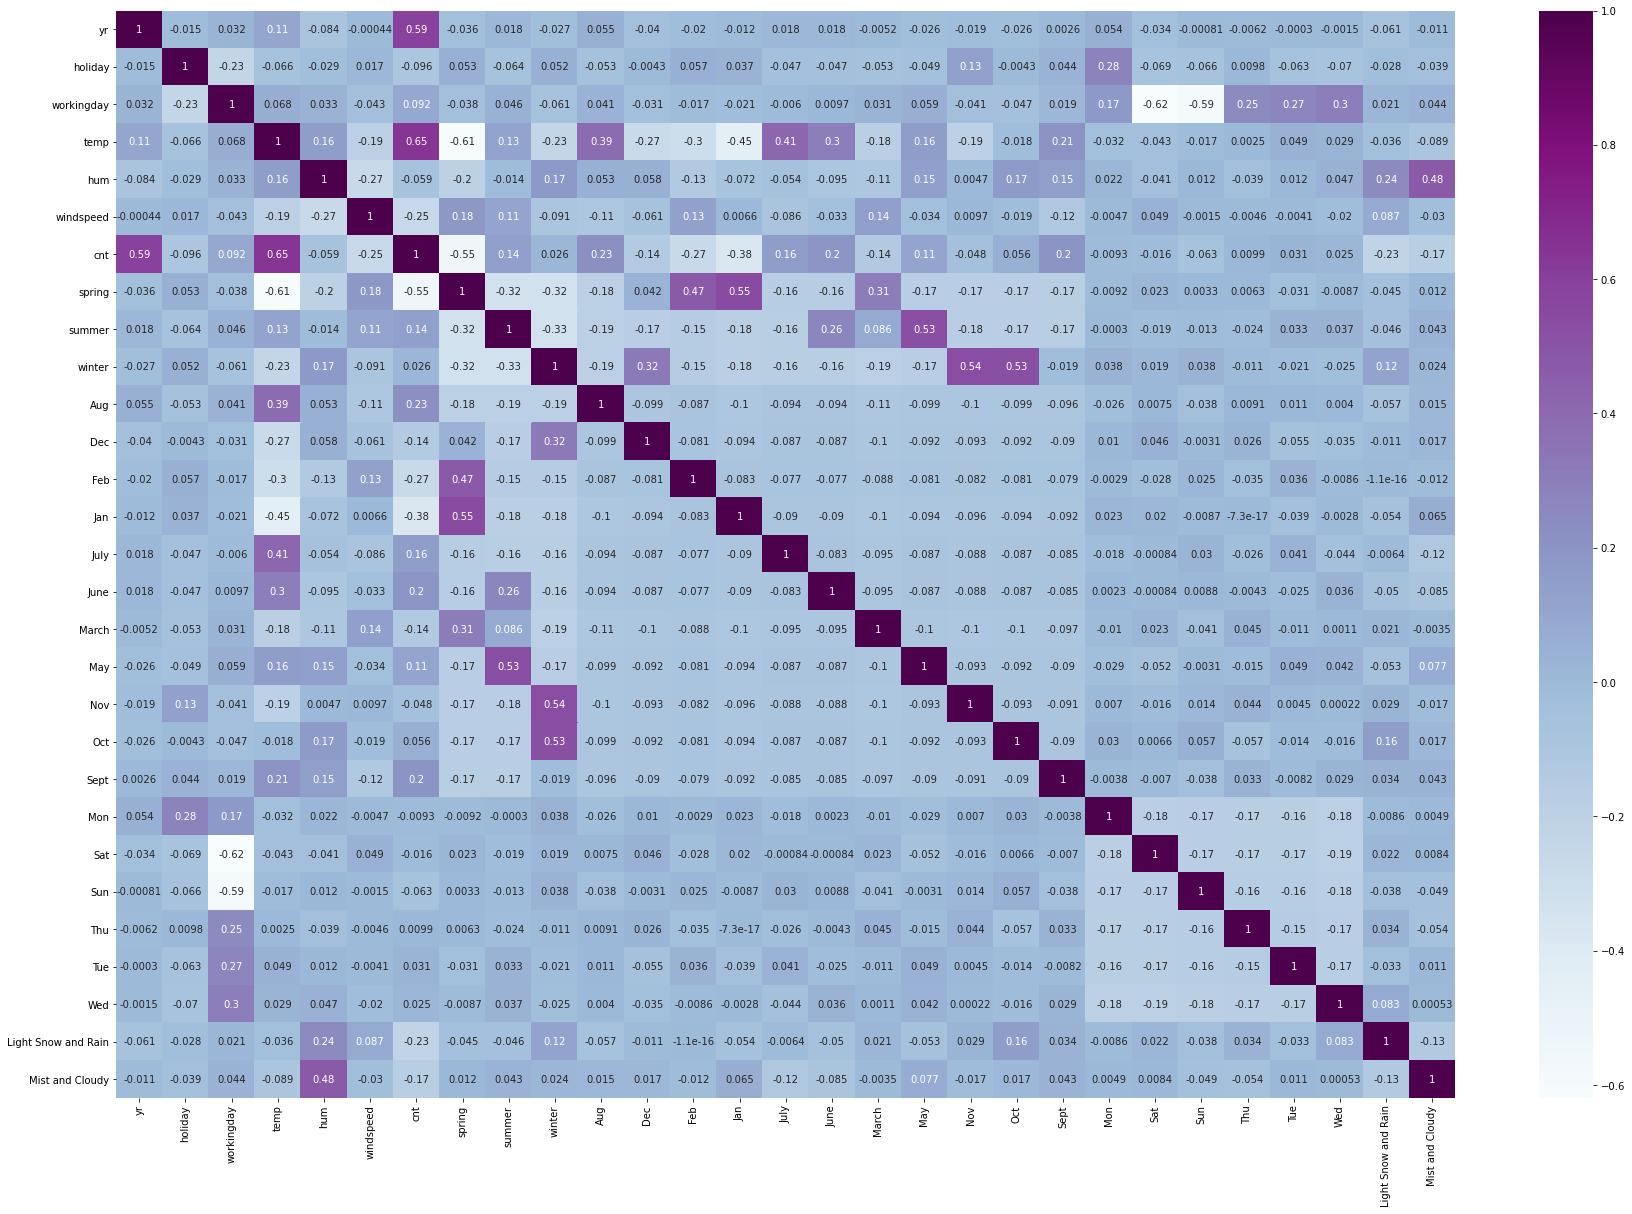

In [41]:
# Checking the correlation between variables to figure out which variables are highly correlated 

plt.figure(figsize=(30,20))
sns.heatmap(day_train.corr(), annot=True, cmap="BuPu")
plt.show()

By looking at the heatmap, temp seems to be correlated to count the most. Let's see the scatterplot for cnt vs temp

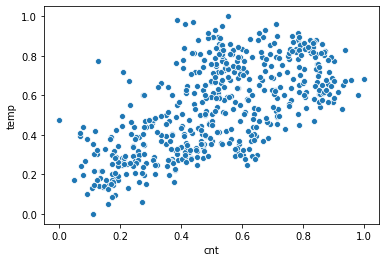

In [42]:
# ScatterPlot for cnt vs temp

sns.scatterplot(day_train.cnt, day_train.temp)
plt.show()

It clearly shows there is a linear correlation between temp and cnt so let's pick temp as the first variable

### Divide into X and Y sets for the model builing

In [43]:
y_train = day_train.pop('cnt')
X_train = day_train

## Step 5:  Building the model using mixed approach (RFE and VIF/p-value)

This time we will be using LinearRegresssion funtion from SciKit Learn library with RFE

#### RFE

Recursive feature elimination

In [44]:
# Import RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
# Running RFE with output number of variable equal to 15

# Create model instance
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Pass the fitted model and number of variables want to choose i.e 15 
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [46]:
# Check the RFE selected feature along with their ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 12),
 ('March', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 11),
 ('Sept', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 7),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 13),
 ('Light Snow and Rain', True, 1),
 ('Mist and Cloudy', True, 1)]

In [47]:
# Take out all the columns where RFE support is True

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'July', 'Sept', 'Sat', 'Light Snow and Rain',
       'Mist and Cloudy'],
      dtype='object')

In [48]:
# Remove the columns that RFE doesn't support

X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'March', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel

In [49]:
# Import statsmodel and VIF libraries

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [51]:
# Adding constant variables
X_train_rfe = sm.add_constant(X_train_rfe)

In [52]:
# Running the model

lr_sm = sm.OLS(y_train, X_train_rfe).fit()

In [53]:
# Check the summary of the linear model

print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          4.22e-191
Time:                        11:05:33   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2519    

`Jan` variable can be dropped as its p-value is close to 5%

### Dropping first variable and updating the model

In [54]:
# Dropping Jan variable

X_train_1 = X_train_rfe.drop(["Jan"], axis = 1)

In [55]:
# Running the model

lr_sm = sm.OLS(y_train, X_train_1).fit()

In [56]:
# Check the summary of the linear model

print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          2.11e-191
Time:                        11:05:33   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2402    

In [57]:
# Create the VIF for the new model

vif = pd.DataFrame()
X = X_train_1
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,82.35
7,spring,5.02
4,temp,3.62
9,winter,3.49
8,summer,2.62
5,hum,1.91
3,workingday,1.88
12,Sat,1.78
14,Mist and Cloudy,1.57
10,July,1.49


We generally want a VIF that is less than 5 so `spring` variable should be dropped

### Dropping second variable and updating the model

In [58]:
# Dropping highly correlated spring variables 

X_train_2 = X_train_1.drop('spring', 1,)

In [59]:
# Run the model again

lr_sm = sm.OLS(y_train, X_train_2).fit()

In [60]:
# Print the summary of the model

print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.6
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          5.23e-191
Time:                        11:05:33   Log-Likelihood:                 513.89
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     496   BIC:                            -940.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1822    

In [61]:
# Create the VIF for the new model

vif = pd.DataFrame()
X = X_train_2
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,52.62
3,workingday,1.88
5,hum,1.88
11,Sat,1.78
4,temp,1.60
13,Mist and Cloudy,1.56
9,July,1.43
7,summer,1.33
8,winter,1.29
12,Light Snow and Rain,1.24


### Dropping third variable and updating the model

In [62]:
# Dropping holiday variable having p-value 0.025

X_train_3 = X_train_2.drop('holiday', 1,)

In [63]:
# Run the model again

lr_sm = sm.OLS(y_train, X_train_3).fit()

In [64]:
# Print the summary of the model

print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          4.14e-191
Time:                        11:05:33   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1712    

In [65]:
# Create the VIF for the new model

vif = pd.DataFrame()
X = X_train_3
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,51.11
4,hum,1.88
2,workingday,1.65
10,Sat,1.64
3,temp,1.60
12,Mist and Cloudy,1.56
8,July,1.43
6,summer,1.33
7,winter,1.29
11,Light Snow and Rain,1.24


### Dropping fourth variable and updating the model


In [66]:
# Dropping July variable having p-value 0.015

X_train_4 = X_train_3.drop('July', 1,)

In [67]:
# Run the model again

lr_sm = sm.OLS(y_train, X_train_4).fit()

In [68]:
# Print the summary of the model

print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Sun, 29 Nov 2020   Prob (F-statistic):          5.10e-191
Time:                        11:05:33   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1705    

In [69]:
# Create the VIF for the new model

vif = pd.DataFrame()
X = X_train_4
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
0,const,51.11
4,hum,1.87
2,workingday,1.65
9,Sat,1.64
11,Mist and Cloudy,1.56
3,temp,1.27
7,winter,1.25
10,Light Snow and Rain,1.24
6,summer,1.19
5,windspeed,1.18


##### Now as we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 6: Residual Analysis of the train data

Need to check if the error term is normally distributed so will plot histogram of the error term

In [70]:
y_train_pred = lr_sm.predict(X_train_4)

Text(0.5, 0, 'Errors')

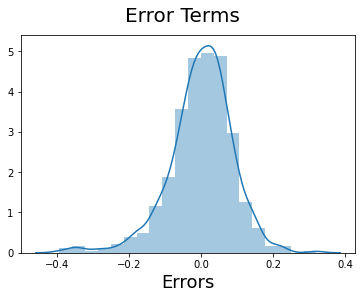

In [71]:
# Plot the histogram of error terms

res = y_train - y_train_pred
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18) 

The Residual histogram is centered around 0 and is normally distributed

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying scaling on the test sets

In [72]:
# Create a list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']

# As the scaler is already fitted on the training dataset, so now same scaler can be used to transform the test dataset
day_test[num_vars] = scaler.transform(day_test[num_vars])

#### Divide into X_test and y_test

In [73]:
y_test = day_test.pop('cnt')
X_test = day_test

In [74]:
# Finding columns in X_train_4

X_train_4.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Sept', 'Sat', 'Light Snow and Rain', 'Mist and Cloudy'],
      dtype='object')

In [75]:
X_train_5 = X_train_4.drop(['const'], axis=1)

In [76]:
# Creating X_test_1 dataframe by dropping variables from X_test
X_test_1 = X_test[X_train_5.columns]

In [77]:
# Adding constant varaible

X_test_1 = sm.add_constant(X_test_1)

In [78]:
# Make predictions
y_pred = lr_sm.predict(X_test_1)

## Step 8 : Model Evaluation


In [79]:
# Use R-squared score method from sklearn library

from sklearn.metrics import r2_score

#### Calculate the R-squared score on the test set.

In [80]:
r2_score(y_true = y_test, y_pred = y_pred)

0.806578880340808

##### The R-squared on the test set is ~ 0.81 and the final R-squared on training set was 0.84. So, its very close to the what we have found on training set.

### Conclusion: 
#### What the model has learning on the training set is able to generalize on the test set

Text(0, 0.5, 'y_pred')

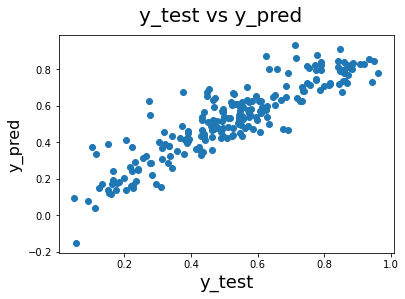

In [81]:
# Plot the graph actual vs predicted value

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16)

The equation for our best fitted line is:


$ cnt = 0.571×temp + 0.229×yr + 0.140×winter + 0.103×Sept + 0.091×summer + 0.053×workingday + 0.063×Sat
      + -0.054×Mist_and_Cloudy + -0.163×hum + -0.186×windspeed + -0.243×Light_Snow_and_Rain + 0.170 $

##  Analysis from the above queation

- The heighest coefficient value is for temp variable i.e 0.571, which means if the temp increases by one unit, the cnt will increase by 0.435
- There are some negative coefficient which means the cnt will decrease if those variables increses